In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
import scipy.stats
from scipy.stats import t, norm, ttest_ind, ttest_rel, ttest_1samp
import decimal
import random
#decimal.getcontext().prec = 4
import itertools
from scipy.stats import nct
from scipy.stats import mode
import math
%matplotlib inline

In [2]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)

In [3]:

def conf_int_one_sample(x,alfa,alternative = 'two-tailed'):
    '''
    alternative == 'two-tailed','less','greater'
    '''
    mean = np.mean(x)
    se = np.std(x,ddof=1)/np.sqrt(len(x))
    if alternative == 'two-tailed':
        return mean - t.ppf(1-alfa/2,df=len(x)-1)*se,mean + t.ppf(1-alfa/2,df=len(x)-1)*se
    elif alternative == 'greater':
        return mean - t.ppf(1-alfa,df=len(x)-1)*se
    elif alternative == 'less':
        return mean + t.ppf(1-alfa,df=len(x)-1)*se

In [4]:

def t_test_for_dependent_groups(x,diff = 0, alternative='two-tailed'):
    n = np.size(x)
    x = np.array(x)
    std = np.std(x,ddof=1)
    mean = np.mean(x)
    se = std/np.sqrt(n)
    ts = (mean-diff)/se
    df = n-1
    if alternative == 'two-tailed':
        p_val = 2*t.sf(np.abs(ts),df)
    if alternative == 'greater':
        p_val = t.sf(ts,df)
    if alternative == 'less':
        p_val = t.cdf(ts, df)
    return p_val

In [5]:

def dependent_1(pop_mean,sample,diff=0,eps = 0):
    mean = np.mean(sample)
    if mean > diff+eps:
        return 'd'
    elif mean <= diff-eps:
        return 'm'
    elif (mean >=delta - eps and mean <= delta + eps):
        return 'nwd'

In [6]:

def dependent_2(pop_mean,sample,alfa,diff=0):
    mean = np.mean(sample)
    result = t_test_for_dependent_groups(sample,diff=0,alternative='greater')
    if result < alfa and mean > diff:
        return 'd'
    elif result > alfa and (mean <= diff):
        return 'm'
    else:
        return 'nwd'
        
    

In [7]:
def dependent_3(pop_mean,sample,alfa,diff=0):
    mean = np.mean(sample)
    result = t_test_for_dependent_groups(sample,diff=diff,alternative='greater')
    result2 = t_test_for_dependent_groups(sample,diff=diff,alternative='less')
    #result3 = t_test_for_dependent_groups(sample,diff=0,alternative='greater')
    if result < alfa and mean > diff:
        return 'd'
    #elif (result2 < alfa and result3 < alfa) and (mean >= 0 and mean <= diff):
    elif (result2 < alfa) and (mean >= 0 and mean <= diff):
    #elif result < alfa and (mean >= 0 and mean <= diff):
        return 'm'
    else:
        return 'nwd'


In [8]:
#-------------------------------------------------------------------------porównanie podejść ---------------------------------------------------------------------------

In [25]:

eps = 0.1
duże1 = []
małe1 = []
duże2 = []
duże3 = []
małe2 = []
małe3 = []
źle_duże1 = []
niewiadomo_duże1 = []
źle_duże2 = []
niewiadomo_duże2 = []
źle_duże3 = []
niewiadomo_duże3 = []
źle_małe1 = []
niewiadomo_małe1 = []
źle_małe2 = []
niewiadomo_małe2 = []
źle_małe3 = []
niewiadomo_małe3 = []
przedziały_n = []
ile_dużych = []
ile_małych = []
means = []
delta = 1
sds = [i*0.1 for i in range(20,50)]
for k in range(1,25): 
    p1,p2 = 15+k*5,20+k*5
    for sd in sds:
        przedziały_n.append(p1)
        pod1 = []
        pod2 = []
        pod3 = []
        for n in range(p1,p2):
            for i in range(0,20):
                pop_mean = i*0.1
#                for j in range(1,5):
                alfa = 0.05
                sample = get_normal_sample(n,pop_mean,sd)
                pod1.append([dependent_1(pop_mean,sample,delta,eps),pop_mean,eps])
                pod2.append([dependent_2(pop_mean,sample,alfa,delta),pop_mean,alfa])
                pod3.append([dependent_3(pop_mean,sample,alfa,delta),pop_mean,alfa])

    # --------------------------------------------------      wśród wyników które były duże, ile z nich wskazał test - (wyniki wskazane przez test)/(faktycznie duże testy
    #---------------------------------------------------      ile razy test wskazał wynik mały, gdy ten w rzeczywistości był duży
    #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
    #podejście 1
        duże_pod1 = [i for i in pod1 if np.abs(i[1]) > np.abs(delta)]

        if len(duże_pod1) != 0:
            pod1_dobrze_duże = len([i for i in duże_pod1 if i[0] == 'd'])/len(duże_pod1)
            pod1_źle_duże = len([i for i in duże_pod1 if i[0] == 'm'])/len(duże_pod1)
            pod1_niewiadomo_duże = len([i for i in duże_pod1 if i[0] == 'nwd'])/len(duże_pod1)
        else:
            pod1_dobrze_duże = 'brak'
            pod1_źle_duże = 'brak'
            pod1_niewiadomo_duże = 'brak'
        #podejście 2
        duże_pod2 = [i for i in pod2 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod2) != 0:
            pod2_dobrze_duże = len([i for i in duże_pod2 if i[0] == 'd'])/len(duże_pod2)
            pod2_źle_duże = len([i for i in duże_pod2 if i[0] == 'm'])/len(duże_pod2)
            pod2_niewiadomo_duże = len([i for i in duże_pod2 if i[0] == 'nwd'])/len(duże_pod2)
        else:
            pod2_dobrze_duże = 'brak'
            pod2_źle_duże = 'brak'
            pod2_niewiadomo_duże = 'brak'
        #podejście 3
        duże_pod3 = [i for i in pod3 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod3) != 0:
            pod3_dobrze_duże = len([i for i in duże_pod3 if i[0] == 'd'])/len(duże_pod3)
            pod3_źle_duże = len([i for i in duże_pod3 if i[0] == 'm'])/len(duże_pod3)
            pod3_niewiadomo_duże = len([i for i in duże_pod3 if i[0] == 'nwd'])/len(duże_pod3)
        else:
            pod3_dobrze_duże = 'brak'
            pod3_źle_duże = 'brak'
            pod3_niewiadomo_duże = 'brak'

        # --------------------------------------------------      wśród wyników które były małe, ile z nich wskazał test - (wyniki małe wskazane przez test)/(faktycznie małe wyniki)
        #---------------------------------------------------      ile razy test wskazał wynik duży, gdy ten w rzeczywistości był mały
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        małe_pod1 = [i for i in pod1 if (np.abs(i[1]) < np.abs(delta))]
        if len(małe_pod1) != 0:
            pod1_dobrze_małe = len([i for i in małe_pod1 if i[0] == 'm'])/len(małe_pod1)
            pod1_źle_małe = len([i for i in małe_pod1 if i[0] == 'd'])/len(małe_pod1)
            pod1_niewiadomo_małe = len([i for i in małe_pod1 if i[0] == 'nwd'])/len(małe_pod1)
        else:
            pod1_dobrze_małe = 'brak'
            pod1_źle_małe = 'brak'
            pod1_niewiadomo_małe = 'brak'

        #podejście 2
        małe_pod2 = [i for i in pod2 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod2) != 0:
            pod2_dobrze_małe = len([i for i in małe_pod2 if i[0] == 'm'])/len(małe_pod2)
            pod2_źle_małe = len([i for i in małe_pod2 if i[0] == 'd'])/len(małe_pod2)
            pod2_niewiadomo_małe = len([i for i in małe_pod2 if i[0] == 'nwd'])/len(małe_pod2)
        else:
            pod2_dobrze_małe = 'brak'
            pod2_źle_małe = 'brak'
            pod2_niewiadomo_małe = 'brak'

        #podejście 3
        małe_pod3 = [i for i in pod3 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod3) != 0:
            pod3_dobrze_małe = len([i for i in małe_pod3 if i[0] == 'm'])/len(małe_pod3)
            pod3_źle_małe = len([i for i in małe_pod3 if i[0] == 'd'])/len(małe_pod3)
            pod3_niewiadomo_małe = len([i for i in małe_pod3 if i[0] == 'nwd'])/len(małe_pod3)
        else:
            pod3_dobrze_małe = 'brak'
            pod3_źle_małe = 'brak'
            pod3_niewiadomo_małe = 'brak'


        duże1.append(pod1_dobrze_duże)
        małe1.append(pod1_dobrze_małe)
        duże2.append(pod2_dobrze_duże)
        duże3.append(pod3_dobrze_duże)
        małe2.append(pod2_dobrze_małe)
        małe3.append(pod3_dobrze_małe)

        źle_duże1.append(pod1_źle_duże)
        źle_duże2.append(pod2_źle_duże)
        źle_duże3.append(pod3_źle_duże)
        niewiadomo_duże1.append(pod1_niewiadomo_duże)
        niewiadomo_duże2.append(pod2_niewiadomo_duże)
        niewiadomo_duże3.append(pod3_niewiadomo_duże)

        źle_małe1.append(pod1_źle_małe)
        źle_małe2.append(pod2_źle_małe)
        źle_małe3.append(pod3_źle_małe)
        niewiadomo_małe1.append(pod1_niewiadomo_małe)
        niewiadomo_małe2.append(pod2_niewiadomo_małe)
        niewiadomo_małe3.append(pod3_niewiadomo_małe)


In [26]:
sdss = sds*25

In [27]:
trzy_podejścia = pd.DataFrame(zip(przedziały_n,sdss,duże1,duże2,duże3,małe1,małe2,małe3,źle_duże1,źle_duże2,źle_duże3,niewiadomo_duże1,niewiadomo_duże2,niewiadomo_małe3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,
                                  niewiadomo_małe2,niewiadomo_małe3), columns = ['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3','mały_podejście1','mały_podejście2','mały_podejście3',
                                                                                 'źle_duże1','źle_duże2','źle_duże3','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3','źle_małe1','źle_małe2','źle_małe3',
                                                                                 'niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'])
trzy_podejścia

wielkość próby   sd  efekt duży, podejście1  efekt duży, podejście2  \
0                20  2.0                0.800000                0.911111   
1                20  2.1                0.866667                0.911111   
2                20  2.2                0.822222                0.866667   
3                20  2.3                0.711111                0.800000   
4                20  2.4                0.822222                0.844444   
..              ...  ...                     ...                     ...   
715             135  4.5                0.755556                0.822222   
716             135  4.6                0.777778                0.866667   
717             135  4.7                0.733333                0.755556   
718             135  4.8                0.711111                0.800000   
719             135  4.9                0.755556                0.800000   

     efekt duży, podejście3  mały_podejście1  mały_podejście2  \
0                  0.266667             0.78             0.66   
1                  0.400000             0.76             0.66   
2                  0.266667             0.82             0.82   
3                  0.222222             0.74             0.70   
4                  0.288889             0.78             0.70   
..                      ...              ...              ...   
715                0.400000             0.82             0.60   
716                0.466667             0.82             0.68   
717                0.400000             0.78             0.68   
718                0.422222             0.82             0.66   
719                0.422222             0.86             0.70   

     mały_podejście3  źle_duże1  źle_duże2  źle_duże3  nie wiadomo duże1  \
0               0.22   0.066667   0.022222   0.000000           0.133333   
1               0.24   0.088889   0.044444   0.000000           0.044444   
2               0.14   0.133333   0.088889   0.000000           0.044444   
3               0.06   0.133333   0.111111   0.000000           0.155556   
4               0.06   0.111111   0.133333   0.022222           0.066667   
..               ...        ...        ...        ...                ...   
715             0.18   0.177778   0.044444   0.022222           0.066667   
716             0.22   0.111111   0.066667   0.022222           0.111111   
717             0.22   0.177778   0.088889   0.022222           0.088889   
718             0.16   0.133333   0.066667   0.000000           0.155556   
719             0.20   0.155556   0.044444   0.022222           0.088889   

     nie wiadomo duże2  nie wiadomo duże3  źle_małe1  źle_małe2  źle_małe3  \
0             0.066667               0.78       0.08       0.10       0.00   
1             0.044444               0.74       0.16       0.22       0.02   
2             0.044444               0.86       0.08       0.12       0.00   
3             0.088889               0.92       0.22       0.24       0.02   
4             0.022222               0.94       0.12       0.16       0.00   
..                 ...                ...        ...        ...        ...   
715           0.133333               0.80       0.10       0.12       0.02   
716           0.066667               0.78       0.08       0.12       0.00   
717           0.155556               0.78       0.14       0.16       0.00   
718           0.133333               0.82       0.10       0.12       0.02   
719           0.155556               0.80       0.06       0.12       0.00   

     niewiadomo_małe1  niewiadomo_małe2  niewiadomo_małe3  
0                0.14              0.24              0.78  
1                0.08              0.12              0.74  
2                0.10              0.06              0.86  
3                0.04              0.06              0.92  
4                0.10              0.14              0.94  
..                ...               ...               ...  
715              0.08              0.28  

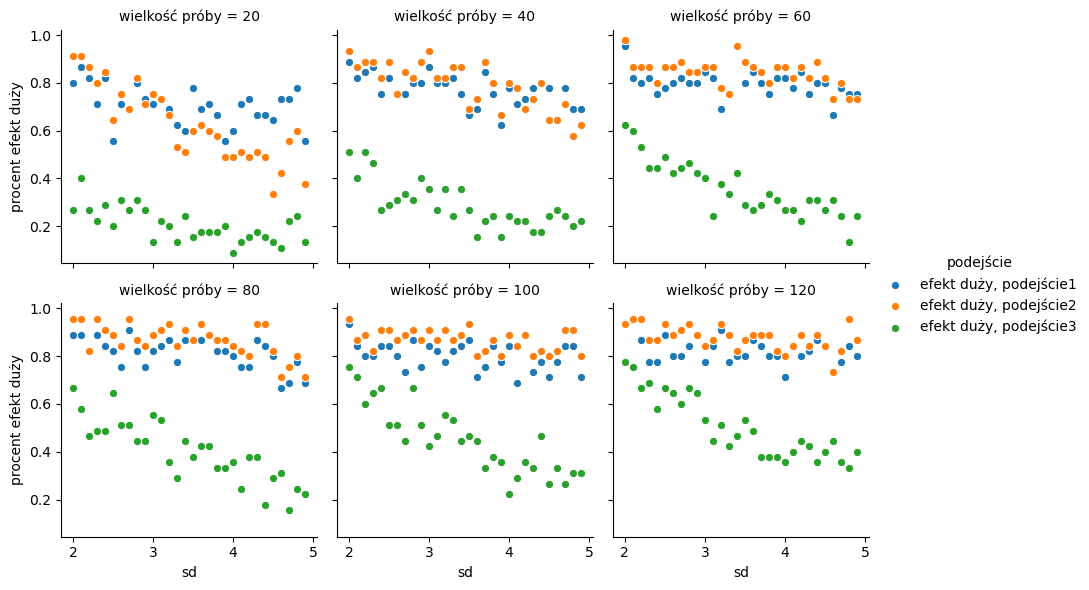

In [28]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży = ['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']

dt = trzy_podejścia[['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3'],value_name='procent efekt duży',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent efekt duży')
g.add_legend()
#g.set(xlabel = 'asd')

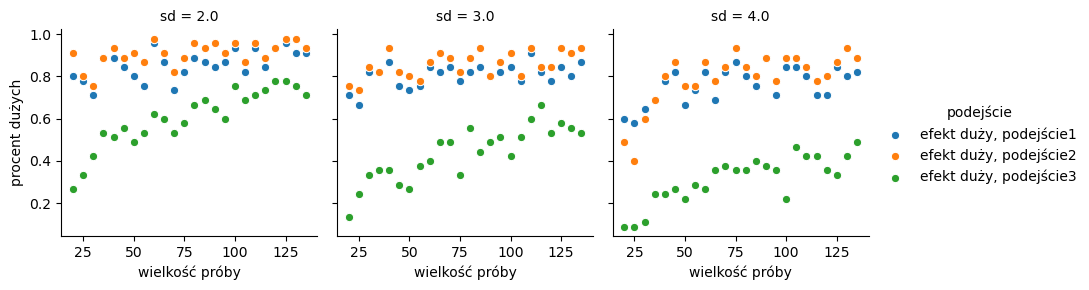

In [29]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_dobrze = ['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']

dt = trzy_podejścia[['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

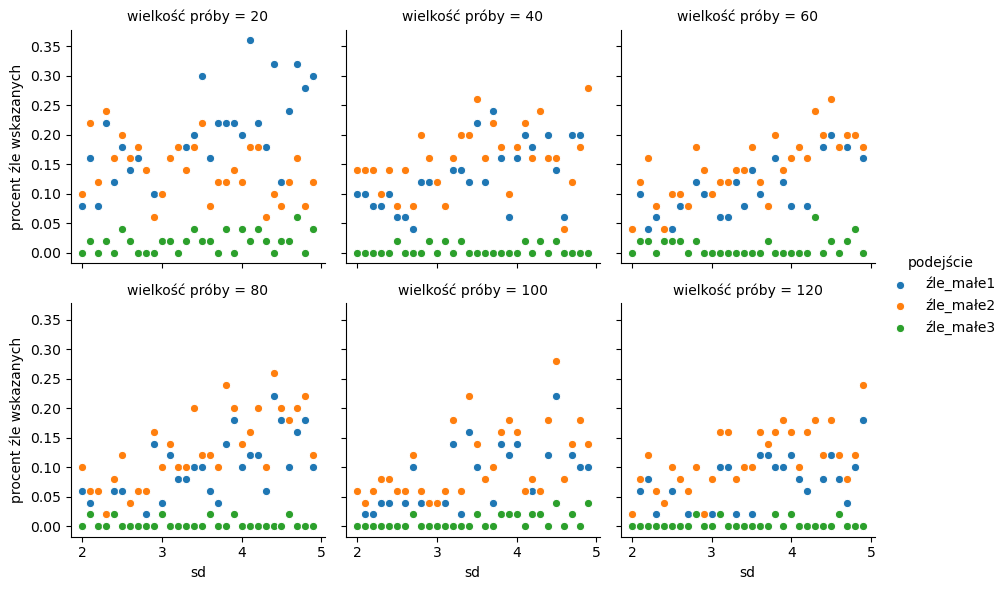

In [30]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
źle_małe = ['źle_małe1','źle_małe2','źle_małe3']

dt = trzy_podejścia[['wielkość próby','sd','źle_małe1','źle_małe2','źle_małe3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['źle_małe1','źle_małe2','źle_małe3'],value_name='procent źle wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

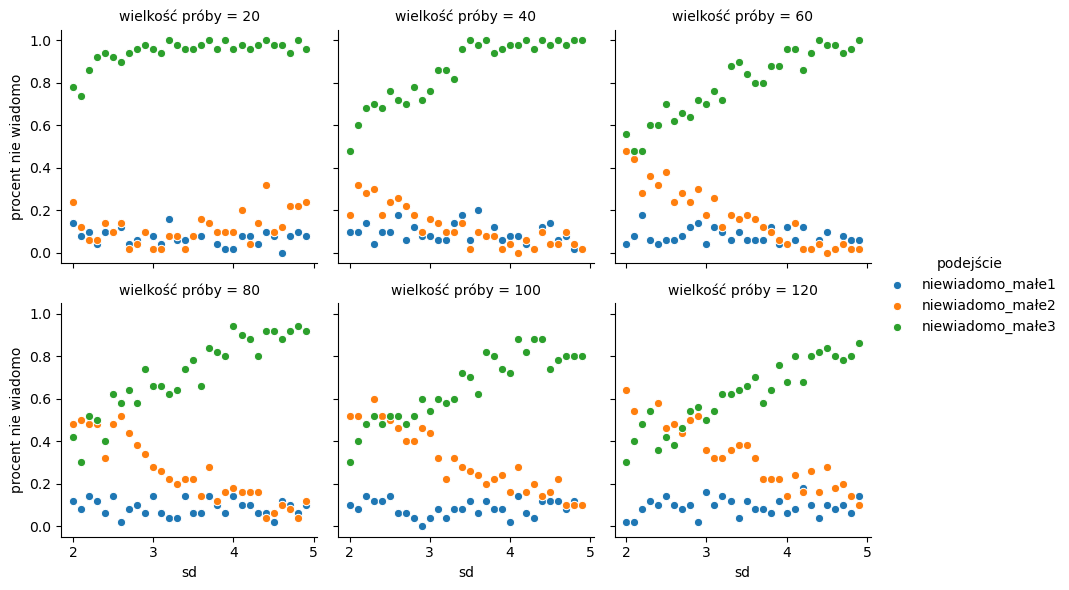

In [31]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_niewiadomo = ['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']

dt = trzy_podejścia[['wielkość próby','sd','niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

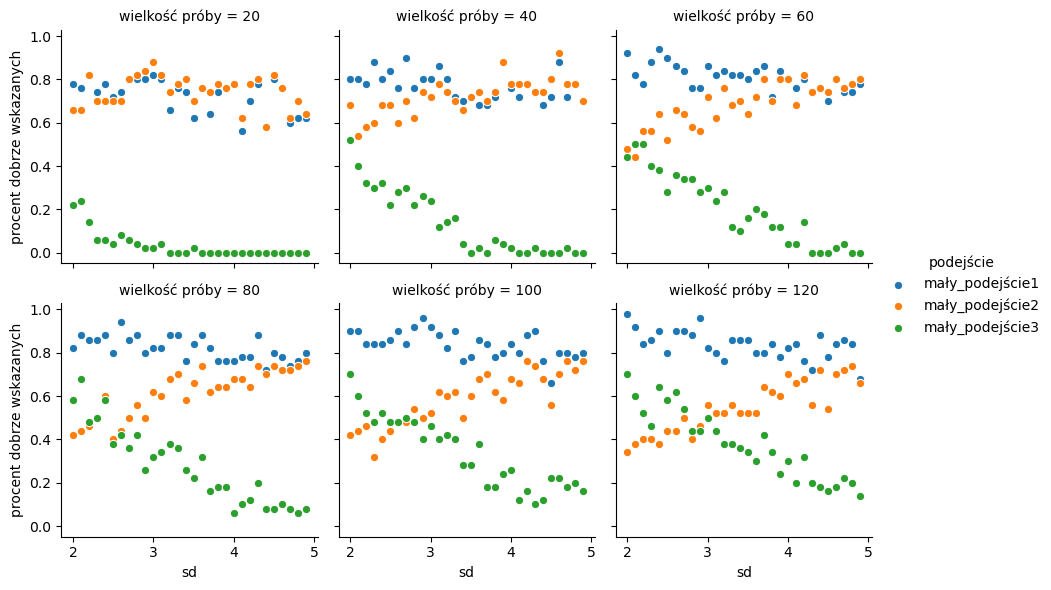

In [32]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','mały_podejście1','mały_podejście2','mały_podejście3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['mały_podejście1','mały_podejście2','mały_podejście3'],value_name='procent dobrze wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent dobrze wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

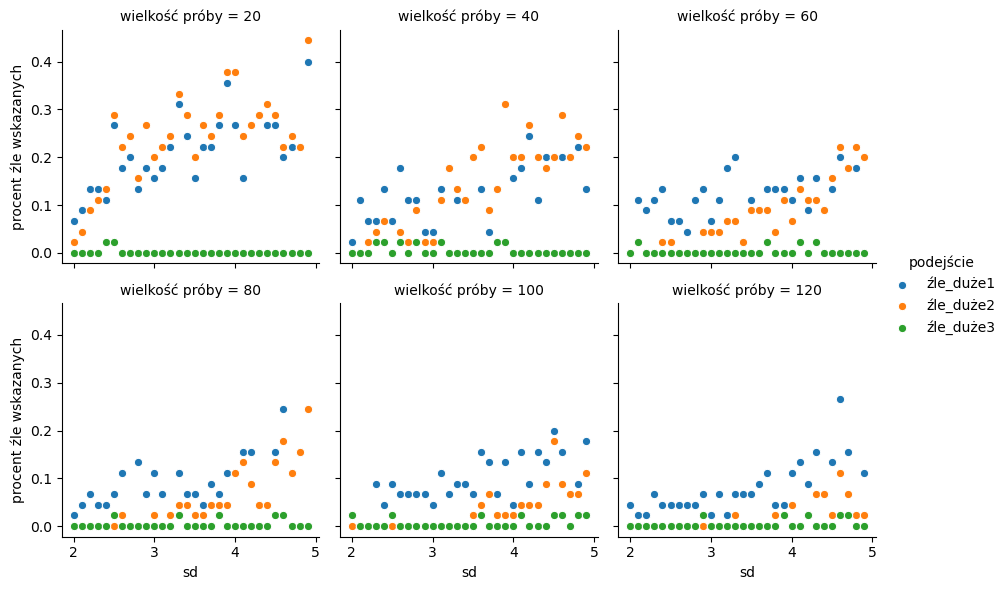

In [33]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_źle = ['źle_duże1','źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','źle_duże1','źle_duże2','źle_duże3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['źle_duże1','źle_duże2','źle_duże3'],value_name='procent źle wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

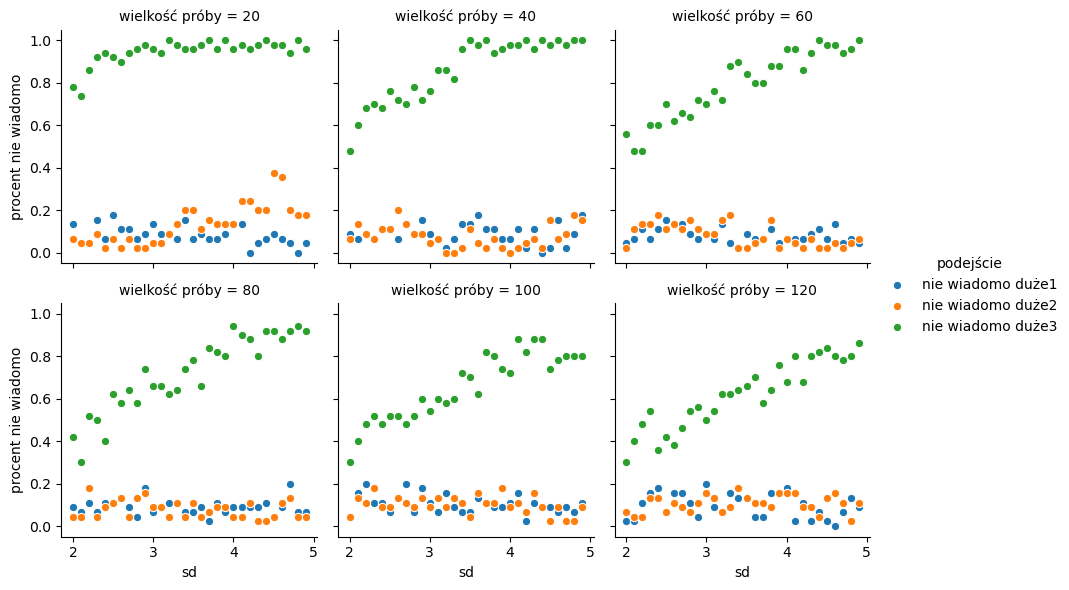

In [34]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_niewiadomo = ['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']
duży_źle = ['źle_duże1','źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

In [30]:
def confs(pop_mean,sample,diff,alfa):
    mean = np.mean(pop_mean)
    przed = conf_int_one_sample(sample,alfa,'greater')
    if przed <= diff:
        return 'm'
    else:
        return 'd'

Wall time: 38.8 s


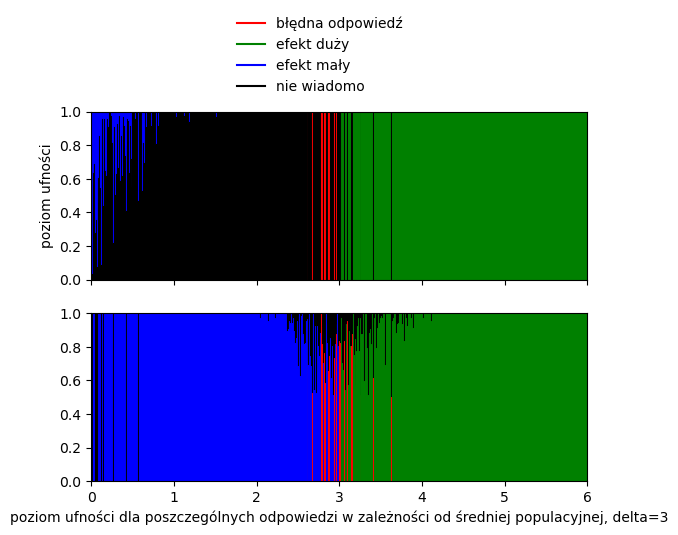

In [41]:
def rysuj():
    fig, (ax1,ax2) = plt.subplots(2,sharex=True)
    n = 50
    sd = 2
    delta = 3
    mean = 0
    ax1.set_xlim(0,6)
    diffs = [i*0.01 for i in range(0,601)]
    for diff in diffs:
        
        sample = get_normal_sample(n,diff,sd)
        
        res2=[dependent_2(diff,sample,i*0.01,delta) for i in range(1,101)]
        res3=[dependent_3(diff,sample,i*0.01,delta) for i in range(1,101)]
        
        res2_vals = {'m':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'm'],'d':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'd'],'nwd':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'nwd']}
        res3_vals = {'m':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'm'],'d':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'd'],'nwd':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'nwd']}
        
        result = diff - delta
        
        if result > 0:

            if len(res2_vals['m']) != 0:
                ax1.axvline(diff,ymin=res2_vals['m'][-1],ymax=res2_vals['m'][0], color = 'red')
            if len(res2_vals['d']) != 0:
                ax1.axvline(diff,ymin=res2_vals['d'][-1],ymax=res2_vals['d'][0], color = 'green')#,label = 'efekt duży')
            if len(res2_vals['nwd']) != 0:
                ax1.axvline(diff,ymin=res2_vals['nwd'][-1],ymax=res2_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')            
            if len(res3_vals['m']) != 0:
                ax2.axvline(diff,ymin=res3_vals['m'][-1],ymax=res3_vals['m'][0], color = 'red')
            if len(res3_vals['d']) != 0:
                ax2.axvline(diff,ymin=res3_vals['d'][-1],ymax=res3_vals['d'][0], color = 'green')#,label = 'efekt duży')
            if len(res3_vals['nwd']) != 0:
                ax2.axvline(diff,ymin=res3_vals['nwd'][-1],ymax=res3_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')
        
        else:

            if len(res2_vals['m']) != 0:
                ax1.axvline(diff,ymin=res2_vals['m'][-1],ymax=res2_vals['m'][0], color = 'blue')#,label = 'efekt mały')
            if len(res2_vals['d']) != 0:
                ax1.axvline(diff,ymin=res2_vals['d'][-1],ymax=res2_vals['d'][0], color = 'red')
            if len(res2_vals['nwd']) != 0:
                ax1.axvline(diff,ymin=res2_vals['nwd'][-1],ymax=res2_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')            
            if len(res3_vals['m']) != 0:
                ax2.axvline(diff,ymin=res3_vals['m'][-1],ymax=res3_vals['m'][0], color = 'blue')#,label = 'efekt mały')
            if len(res3_vals['d']) != 0:
                ax2.axvline(diff,ymin=res3_vals['d'][-1],ymax=res3_vals['d'][0], color = 'red')
            if len(res3_vals['nwd']) != 0:
                ax2.axvline(diff,ymin=res3_vals['nwd'][-1],ymax=res3_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')
        
    ax1.axvline(0,ymin=0,ymax=0,color='red',label = 'błędna odpowiedź')
    ax1.axvline(0,ymin=0,ymax=0,color='green',label = 'efekt duży')
    ax1.axvline(0,ymin=0,ymax=0,color='blue',label = 'efekt mały')
    ax1.axvline(0,ymin=0,ymax=0,color='black',label = 'nie wiadomo')
    ax1.set_ylabel('poziom ufności')
   # ax2.set_xlabel('poziom ufności dla poszczególnych odpowiedzi w zależności od średniej populacyjnej, delta=3')
    mlt.rcParams.update(mlt.rcParamsDefault)
    fig.legend(frameon=False, loc = 'center', bbox_to_anchor = (0.5,1))
        
        
%time rysuj()

In [21]:
eps = 0.5
duże1 = []
małe1 = []
duże2 = []
duże3 = []
małe2 = []
małe3 = []
źle_duże1 = []
niewiadomo_duże1 = []
źle_duże2 = []
niewiadomo_duże2 = []
źle_duże3 = []
niewiadomo_duże3 = []
źle_małe1 = []
niewiadomo_małe1 = []
źle_małe2 = []
niewiadomo_małe2 = []
źle_małe3 = []
niewiadomo_małe3 = []
przedziały_n = []
ile_dużych = []
ile_małych = []
means = []
delta = 4
sds = [i*0.1 for i in range(1,45)]
for k in range(25): 
    p1,p2 = 15+k*5,20+k*5
    for sd in sds:
        przedziały_n.append(p1)
        pod1 = []
        pod2 = []
        pod3 = []
        for n in range(p1,p2):
            for i in range(-20,21):
                pop_mean = np.random.exponential(2,1)
                print(pop_mean)
                #for j in range(1,5):
                alfa = 0.05
                sample = get_normal_sample(n,pop_mean,sd)
                pod1.append([dependent_1(pop_mean,sample,delta,eps),pop_mean,eps])
                pod2.append([dependent_2(pop_mean,sample,alfa,delta),pop_mean,alfa])
                pod3.append([dependent_3(pop_mean,sample,alfa,delta),pop_mean,alfa])

    # --------------------------------------------------      wśród wyników które były duże, ile z nich wskazał test - (wyniki wskazane przez test)/(faktycznie duże testy
    #---------------------------------------------------      ile razy test wskazał wynik mały, gdy ten w rzeczywistości był duży
    #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
    #podejście 1
        duże_pod1 = [i for i in pod1 if i[1] > delta]

        if len(duże_pod1) != 0:
            pod1_dobrze_duże = len([i for i in duże_pod1 if i[0] == 'd'])/len(duże_pod1)
            pod1_źle_duże = len([i for i in duże_pod1 if i[0] == 'm'])/len(duże_pod1)
            pod1_niewiadomo_duże = len([i for i in duże_pod1 if i[0] == 'nwd'])/len(duże_pod1)
        else:
            pod1_dobrze_duże = 'brak'
            pod1_źle_duże = 'brak'
            pod1_niewiadomo_duże = 'brak'
        #podejście 2
        duże_pod2 = [i for i in pod2 if i[1] - delta > 0]
        if len(duże_pod2) != 0:
            pod2_dobrze_duże = len([i for i in duże_pod2 if i[0] == 'd'])/len(duże_pod2)
            pod2_źle_duże = len([i for i in duże_pod2 if i[0] == 'm'])/len(duże_pod2)
            pod2_niewiadomo_duże = len([i for i in duże_pod2 if i[0] == 'nwd'])/len(duże_pod2)
        else:
            pod2_dobrze_duże = 'brak'
            pod2_źle_duże = 'brak'
            pod2_niewiadomo_duże = 'brak'
        #podejście 3
        duże_pod3 = [i for i in pod3 if i[1] - delta > 0]
        if len(duże_pod3) != 0:
            pod3_dobrze_duże = len([i for i in duże_pod3 if i[0] == 'd'])/len(duże_pod3)
            pod3_źle_duże = len([i for i in duże_pod3 if i[0] == 'm'])/len(duże_pod3)
            pod3_niewiadomo_duże = len([i for i in duże_pod3 if i[0] == 'nwd'])/len(duże_pod3)
        else:
            pod3_dobrze_duże = 'brak'
            pod3_źle_duże = 'brak'
            pod3_niewiadomo_duże = 'brak'

        # --------------------------------------------------      wśród wyników które były małe, ile z nich wskazał test - (wyniki małe wskazane przez test)/(faktycznie małe wyniki)
        #---------------------------------------------------      ile razy test wskazał wynik duży, gdy ten w rzeczywistości był mały
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        małe_pod1 = [i for i in pod1 if (i[1] < delta-eps)]
        if len(małe_pod1) != 0:
            pod1_dobrze_małe = len([i for i in małe_pod1 if i[0] == 'm'])/len(małe_pod1)
            pod1_źle_małe = len([i for i in małe_pod1 if i[0] == 'd'])/len(małe_pod1)
            pod1_niewiadomo_małe = len([i for i in małe_pod1 if i[0] == 'nwd'])/len(małe_pod1)
        else:
            pod1_dobrze_małe = 'brak'
            pod1_źle_małe = 'brak'
            pod1_niewiadomo_małe = 'brak'

        #podejście 2
        małe_pod2 = [i for i in pod2 if i[1] - delta < 0]
        if len(małe_pod2) != 0:
            pod2_dobrze_małe = len([i for i in małe_pod2 if i[0] == 'm'])/len(małe_pod2)
            pod2_źle_małe = len([i for i in małe_pod2 if i[0] == 'd'])/len(małe_pod2)
            pod2_niewiadomo_małe = len([i for i in małe_pod2 if i[0] == 'nwd'])/len(małe_pod2)
        else:
            pod2_dobrze_małe = 'brak'
            pod2_źle_małe = 'brak'
            pod2_niewiadomo_małe = 'brak'

        #podejście 3
        małe_pod3 = [i for i in pod3 if i[1] - delta < 0]
        if len(małe_pod3) != 0:
            pod3_dobrze_małe = len([i for i in małe_pod3 if i[0] == 'm'])/len(małe_pod3)
            pod3_źle_małe = len([i for i in małe_pod3 if i[0] == 'd'])/len(małe_pod3)
            pod3_niewiadomo_małe = len([i for i in małe_pod3 if i[0] == 'nwd'])/len(małe_pod3)
        else:
            pod3_dobrze_małe = 'brak'
            pod3_źle_małe = 'brak'
            pod3_niewiadomo_małe = 'brak'


        duże1.append(pod1_dobrze_duże)
        małe1.append(pod1_dobrze_małe)
        duże2.append(pod2_dobrze_duże)
        duże3.append(pod3_dobrze_duże)
        małe2.append(pod2_dobrze_małe)
        małe3.append(pod3_dobrze_małe)

        źle_duże1.append(pod1_źle_duże)
        źle_duże2.append(pod2_źle_duże)
        źle_duże3.append(pod3_źle_duże)
        niewiadomo_duże1.append(pod1_niewiadomo_duże)
        niewiadomo_duże2.append(pod2_niewiadomo_duże)
        niewiadomo_duże3.append(pod3_niewiadomo_duże)

        źle_małe1.append(pod1_źle_małe)
        źle_małe2.append(pod2_źle_małe)
        źle_małe3.append(pod3_źle_małe)
        niewiadomo_małe1.append(pod1_niewiadomo_małe)
        niewiadomo_małe2.append(pod2_niewiadomo_małe)
        niewiadomo_małe3.append(pod3_niewiadomo_małe)


[0.59124827]
[1.54677753]
[2.17576736]
[4.11824173]
[1.7651765]
[0.5812341]
[0.76662717]
[3.28622867]
[6.42177873]
[0.73731151]
[0.04218105]
[0.82615195]
[0.69916179]
[1.61994589]
[3.54423625]
[0.66601737]
[1.46120515]
[1.13639457]
[2.92201316]
[0.07252871]
[2.52779865]
[5.644022]
[0.38358092]
[5.34492706]
[2.20732748]
[0.55139364]
[4.04134911]
[0.70995527]
[0.66574174]
[0.33160917]
[0.64033649]
[0.22538702]
[1.44979574]
[0.75362233]
[3.63965427]
[1.73829031]
[0.00190527]
[0.18927332]
[0.64770816]
[0.47535722]
[1.99763892]
[0.99199676]
[1.07280345]
[0.53440175]
[2.01862584]
[3.49957604]
[0.11407348]
[0.00180366]
[2.19555573]
[1.80282087]
[2.042129]
[3.2902648]
[4.413638]
[0.7991727]
[0.7666232]
[0.20946069]
[2.81845505]
[1.61797944]
[1.67716902]
[0.03041385]
[2.5245663]
[0.03371551]
[3.34891227]
[2.5150201]
[0.5128635]
[2.19340938]
[2.7043834]
[0.23510311]
[1.88540866]
[0.63293323]
[0.57812837]
[2.96975009]
[0.11485766]
[0.80870385]
[1.25615226]
[2.31367504]
[3.67912906]
[1.9019161]
[0

In [22]:
trzy_podejścia = pd.DataFrame(zip(przedziały_n,sdss,duże1,duże2,duże3,małe1,małe2,małe3,źle_duże1,źle_duże2,źle_duże3,niewiadomo_duże1,niewiadomo_duże2,niewiadomo_duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,
                                  niewiadomo_małe2,niewiadomo_małe3), columns = ['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3','mały_podejście1','mały_podejście2','mały_podejście3',
                                                                                 'źle_duże1','źle_duże2','źle_duże3','niewiadomo_duże1','niewiadomo_duże2','niewiadomo_duże3','źle_małe1','źle_małe2','źle_małe3',
                                                                                 'niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'])
trzy_podejścia

wielkość próby   sd  efekt duży, podejście1  efekt duży, podejście2  \
0                15  2.0                1.000000                1.000000   
1                15  2.1                1.000000                1.000000   
2                15  2.2                1.000000                1.000000   
3                15  2.3                1.000000                1.000000   
4                15  2.4                0.913043                0.913043   
..              ...  ...                     ...                     ...   
745              95  4.5                1.000000                1.000000   
746              95  4.6                0.950000                0.950000   
747              95  4.7                1.000000                1.000000   
748             100  4.8                1.000000                1.000000   
749             100  4.9                1.000000                1.000000   

     efekt duży, podejście3  mały_podejście1  mały_podejście2  \
0                  1.000000         0.766082         0.028090   
1                  1.000000         0.747059         0.062857   
2                  1.000000         0.733728         0.039548   
3                  0.896552         0.682353         0.102273   
4                  0.869565         0.677966         0.126374   
..                      ...              ...              ...   
745                0.925926         0.725146         0.365169   
746                0.750000         0.761111         0.324324   
747                0.678571         0.712575         0.344633   
748                1.000000         0.705202         0.005464   
749                0.966667         0.682635         0.028571   

     mały_podejście3  źle_duże1  źle_duże2  źle_duże3  niewiadomo_duże1  \
0           0.971910   0.000000        0.0        0.0               0.0   
1           0.925714   0.000000        0.0        0.0               0.0   
2           0.949153   0.000000        0.0        0.0               0.0   
3           0.875000   0.000000        0.0        0.0               0.0   
4           0.862637   0.086957        0.0        0.0               0.0   
..               ...        ...        ...        ...               ...   
745         0.573034   0.000000        0.0        0.0               0.0   
746         0.632432   0.050000        0.0        0.0               0.0   
747         0.564972   0.000000        0.0        0.0               0.0   
748         0.994536   0.000000        0.0        0.0               0.0   
749         0.965714   0.000000        0.0        0.0               0.0   

     niewiadomo_duże2  niewiadomo_duże3  źle_małe1  źle_małe2  źle_małe3  \
0            0.000000          0.000000   0.000000   0.000000        0.0   
1            0.000000          0.000000   0.000000   0.011429        0.0   
2            0.000000          0.000000   0.000000   0.011299        0.0   
3            0.000000          0.103448   0.000000   0.000000        0.0   
4            0.086957          0.130435   0.000000   0.010989        0.0   
..                ...               ...        ...        ...        ...   
745          0.000000          0.074074   0.000000   0.000000        0.0   
746          0.050000          0.250000   0.005556   0.005405        0.0   
747          0.000000          0.321429   0.000000   0.016949        0.0   
748          0.000000          0.000000   0.000000   0.000000        0.0   
749          0.000000          0.033333   0.000000   0.000000        0.0   

     niewiadomo_małe1  niewiadomo_małe2  niewiadomo_małe3  
0            0.233918          0.971910          0.028090  
1            0.252941          0.925714          0.074286  
2            0.266272          0.949153          0.050847  
3            0.317647          0.897727          0.125000  
4            0.322034          0.862637          0.137363  
..                ...               ...               ...  
745          0.274854          0.634831          0.426966  
746          0.23

In [23]:
sample = get_normal_sample(30,-2,2)
dependent_1(-2,sample,1,-1)

'nwd'

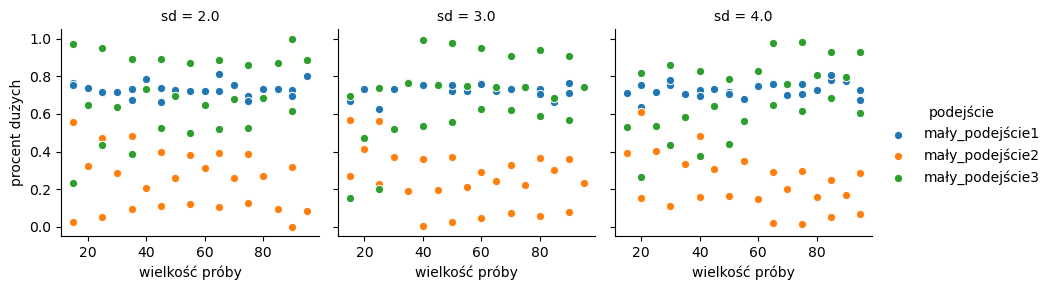

In [24]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','mały_podejście1','mały_podejście2','mały_podejście3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['mały_podejście1','mały_podejście2','mały_podejście3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

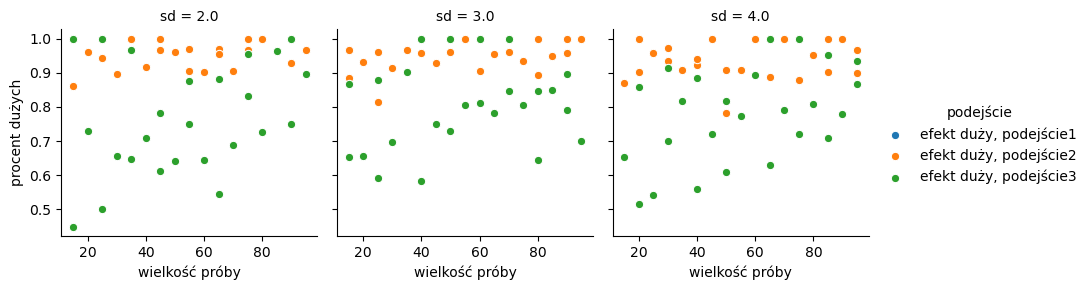

In [25]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_dobrze = ['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']

dt = trzy_podejścia[['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

In [26]:
from scipy.stats import nct

Wall time: 54.5 s


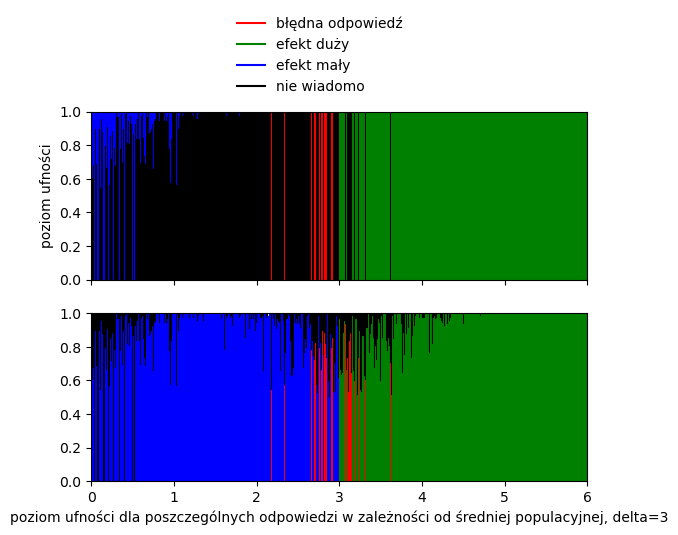

In [27]:
def rysuj():
    fig, (ax1,ax2) = plt.subplots(2,sharex=True)
    n = 25
    sd = 2
    delta = 3
    mean = 0
    ax1.set_xlim(0,6)
    diffs = [i*0.01 for i in range(0,601)]
    for diff in diffs:
        sample = get_normal_sample(n,diff,sd)
        res2=[dependent_2(diff,sample,i*0.01,delta) for i in range(1,101)]
        res3=[dependent_3(diff,sample,i*0.01,delta) for i in range(1,101)]
        result = diff - delta
        res2_vals = {'m':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'm'],'d':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'd'],'nwd':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'nwd']}
        res3_vals = {'m':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'm'],'d':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'd'],'nwd':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'nwd']}
        
        
        if result > 0:

            if len(res2_vals['m']) != 0:
                ax1.axvline(diff,ymin=res2_vals['m'][-1],ymax=res2_vals['m'][0], color = 'red')
            if len(res2_vals['d']) != 0:
                ax1.axvline(diff,ymin=res2_vals['d'][-1],ymax=res2_vals['d'][0], color = 'green')#,label = 'efekt duży')
            if len(res2_vals['nwd']) != 0:
                ax1.axvline(diff,ymin=res2_vals['nwd'][-1],ymax=res2_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')            
            if len(res3_vals['m']) != 0:
                ax2.axvline(diff,ymin=res3_vals['m'][-1],ymax=res3_vals['m'][0], color = 'red')
            if len(res3_vals['d']) != 0:
                ax2.axvline(diff,ymin=res3_vals['d'][-1],ymax=res3_vals['d'][0], color = 'green')#,label = 'efekt duży')
            if len(res3_vals['nwd']) != 0:
                ax2.axvline(diff,ymin=res3_vals['nwd'][-1],ymax=res3_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')
        else:

            if len(res2_vals['m']) != 0:
                ax1.axvline(diff,ymin=res2_vals['m'][-1],ymax=res2_vals['m'][0], color = 'blue')#,label = 'efekt mały')
            if len(res2_vals['d']) != 0:
                ax1.axvline(diff,ymin=res2_vals['d'][-1],ymax=res2_vals['d'][0], color = 'red')
            if len(res2_vals['nwd']) != 0:
                ax1.axvline(diff,ymin=res2_vals['nwd'][-1],ymax=res2_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')            
            if len(res3_vals['m']) != 0:
                ax2.axvline(diff,ymin=res3_vals['m'][-1],ymax=res3_vals['m'][0], color = 'blue')#,label = 'efekt mały')
            if len(res3_vals['d']) != 0:
                ax2.axvline(diff,ymin=res3_vals['d'][-1],ymax=res3_vals['d'][0], color = 'red')
            if len(res3_vals['nwd']) != 0:
                ax2.axvline(diff,ymin=res3_vals['nwd'][-1],ymax=res3_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')
    ax1.axvline(0,ymin=0,ymax=0,color='red',label = 'błędna odpowiedź')
    ax1.axvline(0,ymin=0,ymax=0,color='green',label = 'efekt duży')
    ax1.axvline(0,ymin=0,ymax=0,color='blue',label = 'efekt mały')
    ax1.axvline(0,ymin=0,ymax=0,color='black',label = 'nie wiadomo')
    ax1.set_ylabel('poziom ufności')
    ax2.set_xlabel('poziom ufności dla poszczególnych odpowiedzi w zależności od średniej populacyjnej, delta=3')
    mlt.rcParams.update(mlt.rcParamsDefault)
    fig.legend(frameon=False, loc = 'center', bbox_to_anchor = (0.5,1))
        
        
%time rysuj()

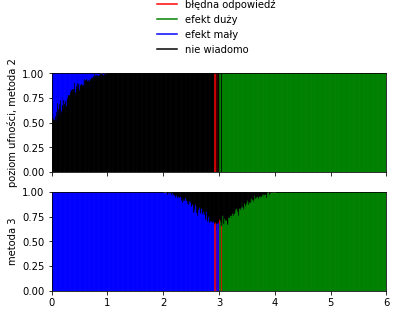

In [8]:

fig, (ax1,ax2) = plt.subplots(2,sharex=True)
n = 50
sd = 3
delta = 3
mean = 0
ax1.set_xlim(0,6)
diffs = [i*0.01 for i in range(0,601)]
for diff in diffs:
    app2 = []
    app3 = []
    dep2 = {}
    dep3 = {}
    for sample in range(100):
        sample = get_normal_sample(n,diff,sd)
        for alfa in range(1,101):
            alfa = 0.01*alfa
            app2.append([1-alfa,dependent_2(diff,sample,alfa,delta)])
            app3.append([1-alfa,dependent_3(diff,sample,alfa,delta)])
    for ufn in range(1,101):
        ufn = ufn*0.01
        dep2[1-ufn] = mode(np.array([i[1] for i in app2 if i[0] == 1- ufn]),axis=None)[0][0]
        dep3[1-ufn] = mode(np.array([i[1] for i in app3 if i[0] == 1- ufn]),axis=None)[0][0]
    m2 = [i for i in dep2.keys() if dep2[i] == 'm']
    d2 = [i for i in dep2.keys() if dep2[i] == 'd']
    nwd2 = [i for i in dep2.keys() if dep2[i] == 'nwd']

    m3 = [i for i in dep3.keys() if dep3[i] == 'm']
    d3 = [i for i in dep3.keys() if dep3[i] == 'd']
    nwd3 = [i for i in dep3.keys() if dep3[i] == 'nwd']

    result = diff-delta

    if result > 0:

        if len(m2) != 0:
            ax1.axvline(diff,ymin=m2[-1],ymax=m2[0], color = 'red')
        if len(d2) != 0:
            ax1.axvline(diff,ymin=d2[-1],ymax=d2[0], color = 'green')#,label = 'efekt duży')
        if len(nwd2) != 0:
            ax1.axvline(diff,ymin=nwd2[-1],ymax=nwd2[0], color = 'black')#,label = 'nie wiadomo')            
        if len(m3) != 0:
            ax2.axvline(diff,m3[-1],ymax=m3[0], color = 'red')
        if len(d3) != 0:
            ax2.axvline(diff,ymin=d3[-1],ymax=d3[0], color = 'green')#,label = 'efekt duży')
        if len(nwd3) != 0:
            ax2.axvline(diff,ymin=nwd3[-1],ymax=nwd3[0], color = 'black')#,label = 'nie wiadomo')
    else:

        if len(m2) != 0:
            ax1.axvline(diff,ymin=m2[-1],ymax=m2[0], color = 'blue')#,label = 'efekt mały')
        if len(d2) != 0:
            ax1.axvline(diff,ymin=d2[-1],ymax=d2[0], color = 'red')
        if len(nwd2) != 0:
            ax1.axvline(diff,ymin=nwd2[-1],ymax=nwd2[0], color = 'black')#,label = 'nie wiadomo')            
        if len(m3) != 0:
            ax2.axvline(diff,ymin=m3[-1],ymax=m3[0], color = 'blue')#,label = 'efekt mały')
        if len(d3) != 0:
            ax2.axvline(diff,ymin=d3[-1],ymax=d3[0], color = 'red')
        if len(nwd3) != 0:
            ax2.axvline(diff,ymin=nwd3[-1],ymax=nwd3[0], color = 'black')#,label = 'nie wiadomo')
ax1.axvline(0,ymin=0,ymax=0,color='red',label = 'błędna odpowiedź')
ax1.axvline(0,ymin=0,ymax=0,color='green',label = 'efekt duży')
ax1.axvline(0,ymin=0,ymax=0,color='blue',label = 'efekt mały')
ax1.axvline(0,ymin=0,ymax=0,color='black',label = 'nie wiadomo')
ax1.set_ylabel('poziom ufności, metoda 2')
ax2.set_ylabel('metoda 3')
#ax2.set_xlabel('poziom ufności dla poszczególnych odpowiedzi w zależności od średniej populacyjnej, delta=3')
mlt.rcParams.update(mlt.rcParamsDefault)
fig.legend(frameon=False, loc = 'center', bbox_to_anchor = (0.5,1))
        

Wall time: 50min 33s


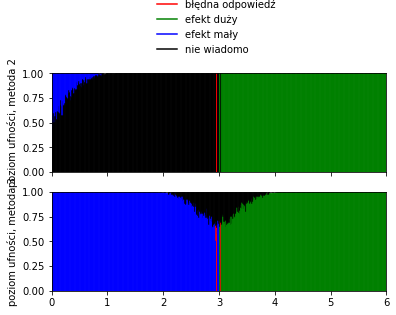

In [28]:
dane = pd.read_csv('data.csv')
dane.head()

Unnamed: 0        x1        x2
0           1  8.954491  1.329358
1           2  2.780098  4.512864
2           3  2.787672  0.993220
3           4  4.754217  2.507327
4           5  5.638987  3.716713

In [29]:
t_test_for_dependent_groups(dane['x1'],diff=0)

5.953242312412422e-18